In [2]:
import osmnx as ox
import pandas as pd
import geopandas as gpd

In [43]:
census_info = pd.read_csv('../../data/processed/census_header.csv')

,device_id,lon,lat,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,state,county,...,MedHouIncome,PerCapIncome,TotPop,White,BlackAA,AIAN,Asian,NHOPI,OtherRace,year
0,00003478e4620de94b73136f76d2683d3451c1758493eb...,-95.578226,30.209056,48,339,690402,4,483396904024,48,339,...,114015,56047,7893,6414,346,0,38,0,530,2019
1,000f0e2cce6bc47d2205eed7d9055bbf3a51fc6f688a5e...,-95.644478,30.209734,48,339,690402,4,483396904024,48,339,...,114015,56047,7893,6414,346,0,38,0,530,2019
2,013bf5eb811209f74c66a2e56b39e88ed55868981b16ce...,-95.634361,30.210126,48,339,690402,4,483396904024,48,339,...,114015,56047,7893,6414,346,0,38,0,530,2019
3,018187f1e65f38dee845d95b0a9bdd780a5dea6c5c7336...,-95.571939,30.214197,48,339,690402,4,483396904024,48,339,...,114015,56047,7893,6414,346,0,38,0,530,2019
4,01c96ef72e4c219d07eeeff32c728aedd5cbf0443e72b0...,-95.662512,30.218735,48,339,690402,4,483396904024,48,339,...,114015,56047,7893,6414,346,0,38,0,530,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666821,73e517f31edb13b4fd423f5ae1271ee8966c4a05be48f4...,-95.277571,29.817064,48,201,230900,2,482012309002,48,201,...,21835,12389,708,142,385,0,0,0,0,2021
666822,afec81a02b6189c8a39fe13fd77a24f22528feb32f30dd...,-95.283313,29.815201,48,201,230900,2,482012309002,48,201,...,21835,12389,708,142,385,0,0,0,0,2021
666823,f61a139cbfee7a177418bf39e82a6b097bcf1772420197...,-95.495808,28.999559,48,39,663000,3,480396630003,48,39,...,-666666666,1031,1309,548,472,9,0,0,105,2021
666824,da67916078d1a44d55d5b3c7a9e05b97439da7f0c36380...,-95.515019,28.989584,48,39,663000,3,480396630003,48,39,...,-666666666,1031,1309,548,472,9,0,0,105,2021


In [54]:
# Remove text up to county name in the column
census_info['NAME'] = census_info['NAME'].str.split(',').str[2:]

# Join the split elements and remove leading/trailing spaces
census_info['NAME'] = census_info['NAME'].apply(lambda x: ', '.join(x).strip())

In [56]:
census_info.NAME.unique()

array(['Montgomery County,  Texas', 'Harris County,  Texas',
       'Austin County,  Texas', 'Galveston County,  Texas',
       'Fort Bend County,  Texas', 'Chambers County,  Texas',
       'Brazoria County,  Texas', 'Liberty County,  Texas',
       'Waller County,  Texas'], dtype=object)

In [62]:
geos = []
counties = ['Montgomery County, Texas', 'Harris County, Texas',
       'Austin County, Texas', 'Galveston County, Texas',
       'Fort Bend County, Texas', 'Chambers County, Texas',
       'Brazoria County, Texas', 'Liberty County, Texas',
       'Waller County, Texas']

for county in counties:
    print(county)
    geos.append(ox.features_from_place(county, tags={'amenity':True, 
                                                      'office':True,
                                                      'shop':True,
                                                      'leisure':True,
                                                      }))

# Some areas have no office buildings

Montgomery County, Texas
Harris County, Texas
Austin County, Texas
Galveston County, Texas
Fort Bend County, Texas
Chambers County, Texas
Brazoria County, Texas
Liberty County, Texas
Waller County, Texas


In [63]:
combined = pd.concat([pd.DataFrame(geo) for geo in geos], ignore_index=True)

In [69]:
selected_amenities = ['school', 'place_of_worship', 'courthouse', 'police', 
       'restaurant', 'theatre', 'cinema',
       'pub', 'shelter', 'bar',
       'fast_food', 'cafe',
       'nightclub', 'fountain', 'library',
       'clinic', 'post_office', 'food_court',
        'pharmacy', 'bank', 
       'car_rental',  'prison', 'university',
       'townhall', 'bus_station', 'fire_station',
        'community_centre']

In [71]:
selected_shops = ['supermarket', 'beauty',
       'mobile_phone', 'sports', 'gift', 'convenience',
       'appliance', 'copyshop', 'optician', 'deli',
       'mall', 'books', 'rental', 'car_repair', 'bakery', 'trade', 'car']

In [72]:
# Not too sure if park will have a polygon
selected_leisure = ['slipway', 'pitch', 'dog_park',
       'bowling_alley', 'stadium', 'park', 'garden', 'playground',
       'ice_rink', 'golf_course', 'sports_centre', 'swimming_pool',]

In [73]:
selected_office = ['government', 'lawyer', 'therapist', 'company', 'it',
       'association', 'advertising_agency', 'estate_agent',
       'financial_advisor']

In [74]:
combined_amenity = combined[combined['amenity'].isin(selected_amenities)]
combined_shop = combined[combined['shop'].isin(selected_shops)]
combined_leisure = combined[combined['leisure'].isin(selected_leisure)]
combined_office = combined[combined['office'].isin(selected_office)]

combined_amenity['category'] = combined_amenity['amenity']
combined_shop['category'] = combined_shop['shop']
combined_leisure['category'] = combined_leisure['leisure']
combined_office['category'] = combined_office['office']

texas_combined_categories = pd.concat([combined_amenity, combined_shop, combined_leisure, combined_office], ignore_index=True)

/tmp/ipykernel_40209/1114716182.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_amenity['category'] = combined_amenity['amenity']
/tmp/ipykernel_40209/1114716182.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_shop['category'] = combined_shop['shop']
/tmp/ipykernel_40209/1114716182.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [78]:
texas_combined_categories.to_csv('../../data/intermediate/texas_combined_categories.csv', index=False)

In [79]:
texas_combined = texas_combined_categories[['name', 'geometry', 'category']]

In [80]:
texas_combined.to_csv('../../data/processed/texas_combined.csv', index=False)

In [4]:
buildings = ox.features_from_place("Liberty County, Texas", tags={'building':True})

<Axes: >

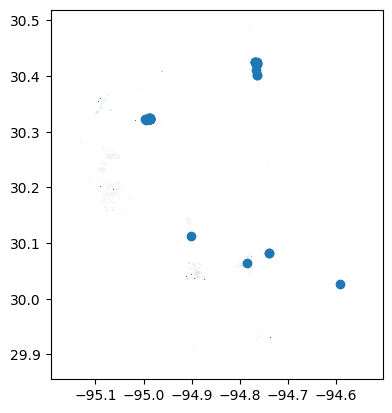

In [5]:
buildings.plot()

In [ ]:
texas_polygons.columns